# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [511]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
from collections import defaultdict

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [512]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [513]:
#Printing out head and columns to explore dataframe
print(properties.columns)
print(properties.head())



Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')
  Unnamed: 0 City of London Barking & Dagenham       Barnet       Bexley  \
0        NaT      E09000001          E09000002    E09000003    E09000004   
1 1995-01-01    91448.98487         50460.2266 

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [514]:
#transposing to get each row a borough
properties = properties.transpose()

#setting the columns to the first row of data (the dates)
properties.columns = properties.iloc[0]

#dropping the first row and resetting the index
properties = properties.drop(properties.index[0]).reset_index()



**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [515]:
#renameing the first column borough and the second column ID
properties.rename(columns={'index':'borough', properties.columns.values[1]:'ID'}, inplace=True)

#getting rid of the unnamed index title
properties.rename_axis('', axis=1, inplace=True)

#getting rid of the rows that contain no data
properties = properties[properties.isna().sum(axis=1)==0]

#printing to check the changes
print(properties.head())

              borough         ID 1995-01-01 00:00:00 1995-02-01 00:00:00  \
0      City of London  E09000001         91448.98487         82202.77314   
1  Barking & Dagenham  E09000002          50460.2266         51085.77983   
2              Barnet  E09000003         93284.51832         93190.16963   
3              Bexley  E09000004         64958.09036         64787.92069   
4               Brent  E09000005         71306.56698         72022.26197   

  1995-03-01 00:00:00 1995-04-01 00:00:00 1995-05-01 00:00:00  \
0         79120.70256         77101.20804         84409.14932   
1         51268.96956         53133.50526         53042.24852   
2         92247.52435         90762.87492         90258.00033   
3         64367.49344         64277.66881         63997.13588   
4         72015.76274         72965.63094         73704.04743   

  1995-06-01 00:00:00 1995-07-01 00:00:00 1995-08-01 00:00:00  ...  \
0         94900.51244         110128.0423         112329.4376  ...   
1         53

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [516]:
#melting data keeping 'borough' and 'ID' as columns and setting variable name column to 'month' and value column to 'Average_price'
properties_melted = properties.melt(id_vars=['borough','ID'], var_name='Month', value_name='Average_price')

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [517]:
#checking that column data types are correct
row = properties_melted.iloc[0]

for col, value in row.items():
    print(f"Column: {col}, Value: {value}, Data type: {type(value)}")

Column: borough, Value: City of London, Data type: <class 'str'>
Column: ID, Value: E09000001, Data type: <class 'str'>
Column: Month, Value: 1995-01-01 00:00:00, Data type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Column: Average_price, Value: 91448.98487, Data type: <class 'float'>


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [518]:
#Printed number of observations in each column to make sure it's all the same.
#I cleaned the rows with no data earlier
#I will remove the rows which aren't london boroughs later
print(properties.count())
print(list(properties.count()!=45))


borough                45
ID                     45
1995-01-01 00:00:00    45
1995-02-01 00:00:00    45
1995-03-01 00:00:00    45
                       ..
2024-06-01 00:00:00    45
2024-07-01 00:00:00    45
2024-08-01 00:00:00    45
2024-09-01 00:00:00    45
2024-10-01 00:00:00    45
Length: 360, dtype: int64
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

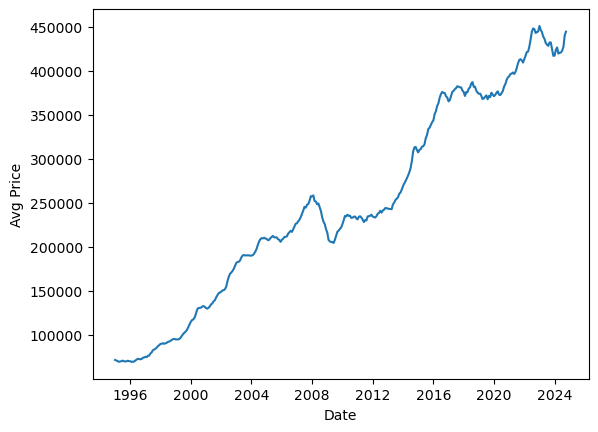

In [519]:
#Subsetting the rows with the borough sutton from melted df and using them for line plot of month vs average price
row_values = properties_melted[properties_melted['borough']=='Sutton']
plt.plot(row_values['Month'], row_values['Average_price'],)
plt.xlabel('Date')
plt.ylabel('Avg Price')
plt.show()


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [520]:
#creating a year column and checking that this worked
properties_melted['Year'] = properties_melted['Month'].dt.year
print(properties_melted[(properties_melted['Year']==1998) & (properties_melted['borough']=='Bromley')])

      borough         ID      Month Average_price  Year
1625  Bromley  E09000006 1998-01-01   102341.8156  1998
1670  Bromley  E09000006 1998-02-01   103543.2009  1998
1715  Bromley  E09000006 1998-03-01   104597.2887  1998
1760  Bromley  E09000006 1998-04-01   105239.6534  1998
1805  Bromley  E09000006 1998-05-01   105759.5103  1998
1850  Bromley  E09000006 1998-06-01    107198.021  1998
1895  Bromley  E09000006 1998-07-01   108989.3867  1998
1940  Bromley  E09000006 1998-08-01   111457.0034  1998
1985  Bromley  E09000006 1998-09-01   112709.4413  1998
2030  Bromley  E09000006 1998-10-01   112592.3065  1998
2075  Bromley  E09000006 1998-11-01   112196.6123  1998
2120  Bromley  E09000006 1998-12-01   112814.0055  1998


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [521]:
def price_ratio(borough):
    """
    Takes in the name of a borough and calculates the price ratio of average prices in 1998 over average prices
    in 2018 for that borough
    """
    rows_1998 = properties_melted[(properties_melted['borough']==borough) & (properties_melted['Year']==1998)]
    avg_price_1998 = rows_1998['Average_price'].mean()

    rows_2018 = properties_melted[(properties_melted['borough']==borough) & (properties_melted['Year']==2018)]
    avg_price_2018 = rows_2018['Average_price'].mean()

    price_ratio = avg_price_1998/avg_price_2018

    return price_ratio


#Not all entries are borough of london. I'm selecting for the boroughs.
borough_rows = properties[(properties['ID'].astype(str).str.startswith('E09')) & (properties['borough']!='City of London')]


#Creating a list of these 32 boroughs
borough_list = list(borough_rows['borough'])

#Creating a dictionary of lists
price_ratio_dict = defaultdict(list)

#filling dictionary of lists with the boroughs and price ratios
for borough in borough_list:
    price_ratio_dict['Borough'].append(borough)
    price_ratio_dict['Price_Ratio'].append(price_ratio(borough))
    
#converting the dictionary of lists to a data frame    
price_ratio_df = pd.DataFrame(price_ratio_dict)

#sorting and outputting the data frame
price_ratio_sorted = price_ratio_df.sort_values('Price_Ratio', ascending=True)
print(price_ratio_sorted)

  


                 Borough  Price_Ratio
10               Hackney     0.161334
29        Waltham Forest     0.171376
26             Southwark     0.181279
21              Lewisham     0.183557
31           Westminster     0.186821
23                Newham     0.188407
12              Haringey     0.194759
18  Kensington & Chelsea     0.196766
20               Lambeth     0.201686
5                 Camden     0.202674
0     Barking & Dagenham     0.204231
3                  Brent     0.204271
17             Islington     0.206531
9              Greenwich     0.209927
30            Wandsworth     0.210191
22                Merton     0.210741
28         Tower Hamlets     0.216135
24             Redbridge     0.223704
1                 Barnet     0.229474
14              Havering     0.231167
7                 Ealing     0.231923
19  Kingston upon Thames     0.234190
8                Enfield     0.234590
2                 Bexley     0.235303
6                Croydon     0.238039
15          

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

I can conclude that Hackney is the borough that has seen the greatest increase in housing prices on average over the last two decades from the sorted data frame of price ratios I have above.